# Clustering

Clustering is a process by which you collect a large number of data points into a smaller number of groups, based on the distances between them. It is useful in cases where the volumes of data are large and you want to extract some figures of interest. It is a type of _unsupervised learning_.

There are a number of algorithms available for performing clustering but the simplest and most common is [_k-means clustering_](https://en.wikipedia.org/wiki/K-means_clustering).

It works by taking the n-dimensional data provided, $D$ and randomly places $k$ seed points in the field which represent the centres of the initial clusters.

1. It then iterates over every data point in $D$ and assigns each to be associated with whichever cluster centre is closest.
2. Once all points have been associated with a cluster, it then iterates over each cluster and calculates the new mean of the cluster to be the centroid of all the points assigned to it.

Steps 1 and 2 are repeated until the algorithm converges on a result.

## A simple example

Let's start by using scikit-learn to provide us with some randonly generated data points. It provides a function called `make_blobs()` which creates a number of gaussian clusters. 

We'll ask it to create 500 points in 4 clusters. We set `random_state=6` to ensure that this example will always generate the same points for reproducibility.

In [1]:
from sklearn.datasets import make_blobs

data, true_labels = make_blobs(n_samples=500, centers=4, random_state=6)

We then put the data into a pandas DataFrame to give us a nicer API for working with it. We plot it to see what it looks like, colouring each point according to what cluster is was generated from.

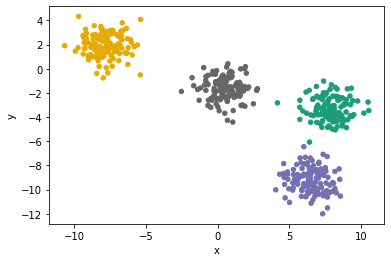

In [2]:
%matplotlib inline

from pandas import DataFrame

points = DataFrame(data, columns=["x", "y"])
points.plot.scatter("x", "y", c=true_labels, colormap="Dark2", colorbar=False)

We can see where that these clusters are very distinct. This is a very good situation to use k-means clustering in and it will give a useful result.

We initialise the `KMeans` object with the number of clusters we are looking for. This is important as k-means requires this decision to be made up-front. There are some clustering algorithms which can attempt to calculate the number of clusters for you but when using k-means you need to make that assessment yourself.

There are other parameters that can be passed to `KMeans` which are explained in full in [the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

Passing the data you want to fit to the `fit()` method will then actually perform the algormithm. You can pass in nested lists, numpy arrays (as long as they have the shape `(n_samples, n_features)`) or pandas DataFrames.

In [3]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4).fit(points)

Now that we have calculated the cluster centres, we can use the `cluster_centers_` data attribute of our model to see what clusters it has decided on.

In [4]:
cluster_centers = DataFrame(kmeans.cluster_centers_, columns=["x", "y"])
cluster_centers

x         y
0  7.886559 -3.337117
1 -7.857994  1.892259
2  0.485425 -1.628580
3  6.485156 -9.212537

Comparing these $x$ and $y$ values against the plot above, we see that it seems to have placed the centres in the correct location. It's better though to be able to see this directly, so let's plotthe centres on top of the original data.

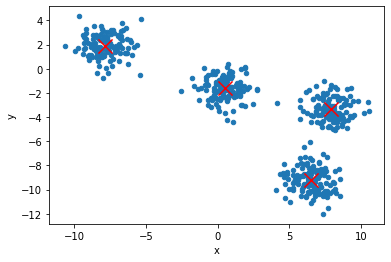

In [5]:
ax = points.plot.scatter("x", "y")
cluster_centers.plot.scatter("x", "y", ax=ax, c="red", s=200, marker="x")

The other piece of data that we can retrieve from the model is which cluster it assigned to each data point. This is available as the `labels_` data attribute and is an array with 500 entries, each being a number between 0 and 3. We can use it to colour our plot to see the clusters emerge.

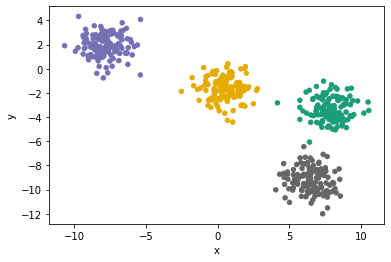

In [6]:
points.plot.scatter("x", "y", c=kmeans.labels_, colormap="Dark2", colorbar=False)

### Exercise 1

- Run the above example again but try setting different `random_state` values when creating the blobs. What happens when the generated clusters overlap a lot?

### Exercise 2

- Using the data provided by [`sklearn.datasets.load_iris`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html), perform the clustering on the data.

  Tip: load the data into a `DataFrame` with:

  ```python
  from sklearn.datasets import load_iris
  iris = DataFrame(load_iris().data, columns=load_iris().feature_names)
  ```
  
  Tip: Note that the Iris dataset has four input dimensions. You can pass all four columns into the k-means clustering algorithm.
  
  [<small>answer</small>](answer_iris_clustering.ipynb)

### Exercise 3 (optional)

- Another data attribute of the model is `inertia_` which gives you the sum of the squared distances of data points to their closest cluster center. It is this attribute which the algorithm uses to decide whether it has converged. In general a smaller number represents a better fit.

  Write a loop which performs the k-means fit over the blob-generated data with the number of clusters varying from 2 up to 7. For each of these fits, extract the value of the `inertia_` attribute and draw a plot of inertia against number of clusters.
  
  [<small>answer</small>](answer_blob_inertia.ipynb)

Now that we understand clustering on simple data sets, we will find some real examples to play with.